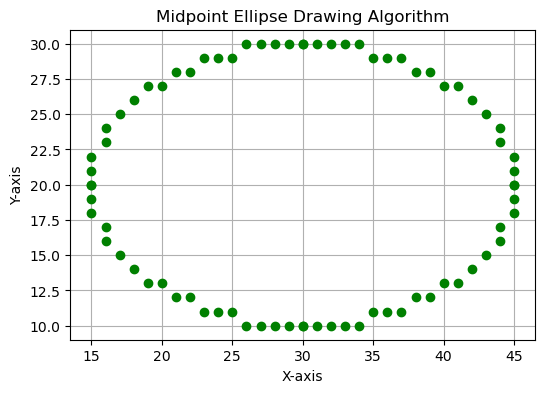

In [2]:
import matplotlib.pyplot as plt

def plot_ellipse_points(xc, yc, x, y, points):
    # 4-way symmetry for ellipse
    points.extend([
        (xc + x, yc + y),
        (xc - x, yc + y),
        (xc + x, yc - y),
        (xc - x, yc - y)
    ])

def midpoint_ellipse(xc, yc, rx, ry):
    x = 0
    y = ry
    points = []

    # Region 1
    p1 = ry**2 - (rx**2 * ry) + (0.25 * rx**2)
    dx = 2 * ry**2 * x
    dy = 2 * rx**2 * y

    while dx < dy:
        plot_ellipse_points(xc, yc, x, y, points)
        x += 1
        dx += 2 * ry**2
        if p1 < 0:
            p1 += dx + ry**2
        else:
            y -= 1
            dy -= 2 * rx**2
            p1 += dx - dy + ry**2

    # Region 2
    p2 = (ry**2) * ((x + 0.5)**2) + (rx**2) * ((y - 1)**2) - (rx**2 * ry**2)

    while y >= 0:
        plot_ellipse_points(xc, yc, x, y, points)
        y -= 1
        dy -= 2 * rx**2
        if p2 > 0:
            p2 += rx**2 - dy
        else:
            x += 1
            dx += 2 * ry**2
            p2 += dx - dy + rx**2

    return points

def draw_ellipse(xc, yc, rx, ry):
    points = midpoint_ellipse(xc, yc, rx, ry)
    xs, ys = zip(*points)

    plt.figure(figsize=(6, 6))
    plt.plot(xs, ys, 'go')  # green points
    plt.title("Midpoint Ellipse Drawing Algorithm")
    plt.xlabel("X-axis")
    plt.ylabel("Y-axis")
    plt.savefig("Midpoint Ellipse Drawing Algorithm.jpg")
    plt.grid(True)
    plt.gca().set_aspect('equal', adjustable='box')
    plt.show()

# Example usage
center_x = 30
center_y = 20
rx = 15  # semi-major axis
ry = 10  # semi-minor axis

draw_ellipse(center_x, center_y, rx, ry)
